# PyKS2

ZC. Fang (Copyright &copy; 2018)

一个读取日本共和电业（Kyowa）KS2数据文件的python库。提供读取、转存.mat格式和基本的绘图功能。

依赖python包：

+ numpy >= 1.13
+ scipy >= 0.19
+ pandas >= 0.20
+ matplotlib >= 2.0

## 导入PyKS2及相关依赖包

In [5]:
from pyks2 import *

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# 图片行内显示
%matplotlib inline

In [4]:
print("Numpy version:", np.__version__)
print("Scipy version:", sp.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", mpl.__version__)

Numpy version: 1.14.0
Scipy version: 1.0.0
Pandas version: 0.22.0
Matplotlib version: 2.1.1


## 载入KS2文件

In [6]:
ks2 = KS2("example.ks2")

CoeffA: [0.00079395 0.00095716 0.00067417 0.00069591 0.00068287]
CoeffB: [-0.11988691 -0.13783051  0.02831522 -0.09673096  0.69243526]
Ch Unit: ['cm', 'cm', 'kg', 'kg', 'kg']
Calibration Coefficient: [5.0813   6.1258   0.043147 0.044538 0.043704]
Offset: [-0.11988691 -0.13783051  0.02831522 -0.09673096  0.69243526]
Valid Channel Index: [1 2 3 4 5]
Ch Name: ['WaveF(4.0m)', 'WaveC', 'Fx', 'Fy', 'Fz']
Ch Range: [' 5.0V', ' 5.0V', '500um/m', '500um/m', '500um/m']
Ch Low Pass Filter Info: ['100Hz', '100Hz', '300Hz', '300Hz', '300Hz']
Ch High Pass Filter Info: ['0.2Hz', '0.2Hz', 'OFF  ', 'OFF  ', 'OFF  ']
Start Time:  20171204134454  
Number of Samples: 35300
Reading Data... Done.


## 转存格式

In [7]:
# 指定导出文件名savename
# 后缀名.mat
ks2.save(savename='example.mat')

Saving data in mat format...


## 绘图

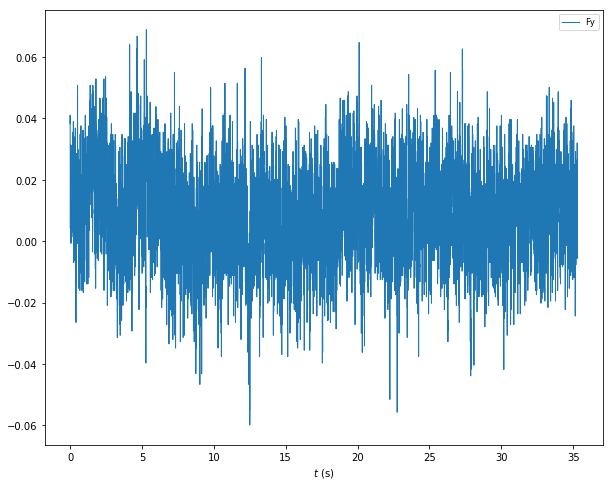

In [12]:
# select channel
# 0 ~ chN-1 (type: list)
# None -> all channels
ch = None
ch = [3]

if ch is None:
    ch = range(ks2.chN)

# select downsampled sampling frequency
fsDS = 200

# down sample the data for plotting
di = round(max(1, ks2.fs / fsDS))
rawDS = ks2.raw[::di, :]
if len(ch) == 1:
    dataDS = np.array(list(map(
        lambda i: ks2.coefA[i] * rawDS[:, i] + ks2.coefB[i], ch))).reshape((-1, 1))
else:
    dataDS = np.array(
        list(map(lambda i: ks2.coefA[i] * rawDS[:, i] + ks2.coefB[i], ch))).T

t = np.arange(dataDS.shape[0]) / (ks2.fs / di)
chNames = list(map(lambda i: ks2.chName[i], ch))
dataframe = pd.DataFrame(dataDS, index=t, columns=chNames)
ax = dataframe.plot(figsize=(10, 8), linewidth=1)
ax.set_xlabel(r'$t$ (s)')
ax.legend(loc=1, fontsize='small')
